In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit
import math
import seaborn as sns

def CountSecond(time):
    start_time = [23, 14, 0]
    times = time.split(':')
    h = int(times[0]) - start_time[0]
    m = int(times[1]) - start_time[1]
    s = int(times[2]) - start_time[2]
    return h * 3600 + m * 60 + s


def CountSecond2(time):
    times = time.split(':')
    h = int(times[0])
    m = int(times[1])
    s = int(times[2])
    return h * 3600 + m * 60 + s + 2760

In [2]:
def rawData():
    countDict = {item: 0 for item in range(300)}
    fp = open('sina_01_1.csv', 'r')
    for line in fp:
        rets = line.strip().split(',')
        fmin = int(CountSecond(rets[3]) / 300)

        if fmin in countDict:
            countDict[fmin] += 1

    fp = open('sina_01_2.csv', 'r')
    for line in fp:
        rets = line.strip().split(',')
        fmin = int(CountSecond2(rets[3]) / 300)

        if fmin in countDict:
            countDict[fmin] += 1
    countList = sorted(countDict.items(), key=lambda x: x[0])
    left, value = [], []
    for item in countList:
        left.append(item[0])
        value.append(item[1])
    return left, value

In [3]:
left, value = rawData()
xdata = np.array(left, dtype=np.float32)
ydata = np.array(value, dtype=np.float32)
%matplotlib inline

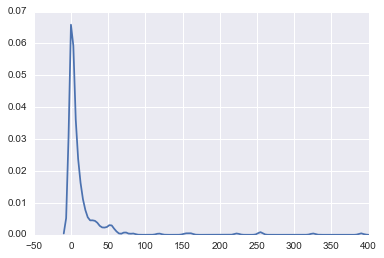

In [14]:
sns.kdeplot(ydata, kernel='gau')

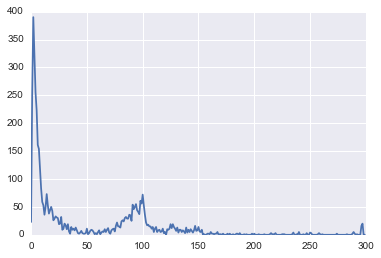

In [37]:
# plt.bar(xdata, ydata)
plt.plot(ydata)

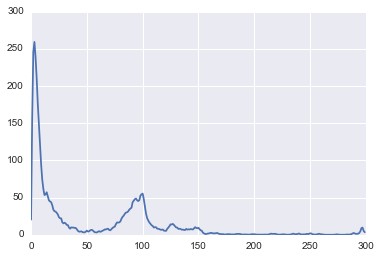

In [48]:
from pykalman import KalmanFilter
kf = KalmanFilter(initial_state_mean=0, n_dim_obs=1)
measurements = [1, 0, 0, 1]
y = kf.em(measurements).smooth(ydata)[0]
yplot = [item[0] for item in y]
plt.plot(yplot)